In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from utils import classification_evaluation, user_input, pipe_model
import pandas as pd
from sklearn.model_selection import train_test_split

### For feature standardization

In [2]:
scaler = StandardScaler()

param_grid_linear_svc = {
    "svc__C": [0.1, 1, 10],
    "svc__penalty": ['l1', 'l2']
}

pipeline_linear_svc = Pipeline([
    ("scaler", scaler),
    ("svc", LinearSVC(max_iter=100000, dual=False))
])

classifier_linear_svc = GridSearchCV(
    estimator=pipeline_linear_svc,
    param_grid=param_grid_linear_svc,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    error_score='raise'
)



In [3]:
dataframe =  pd.read_csv('../data/cleaned_dataset_2.csv')

In [4]:
dataframe.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,gender_women
0,1,20228,140,90,3,1,0,0,1,1,55,34.927679,1
1,2,18857,130,70,3,1,0,0,0,1,52,23.507805,1
2,4,17474,100,60,1,1,0,0,0,0,48,23.011177,1
3,9,22113,130,80,3,1,0,0,1,0,61,37.729725,1
4,12,22584,130,90,3,3,0,0,1,1,62,29.983588,0


In [5]:
X1, y1 = dataframe.drop("cardio", axis=1), dataframe["cardio"]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [6]:
X_train.shape  , X_test.shape, y_train.shape, y_test.shape

((31712, 12), (13592, 12), (31712,), (13592,))

In [7]:
X_train_for_val, X_val, y_train_for_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Split the data into training and validation sets
X_train_for_val.shape, X_val.shape, y_train_for_val.shape, y_val.shape

((25369, 12), (6343, 12), (25369,), (6343,))

In [8]:
classifier_linear_svc.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        LinearSVC(dual=False,
                                                  max_iter=100000))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [9]:
classifier_linear_svc.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('svc', LinearSVC(C=1, dual=False, max_iter=100000, penalty='l1'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'svc': LinearSVC(C=1, dual=False, max_iter=100000, penalty='l1'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svc__C': 1,
 'svc__class_weight': None,
 'svc__dual': False,
 'svc__fit_intercept': True,
 'svc__intercept_scaling': 1,
 'svc__loss': 'squared_hinge',
 'svc__max_iter': 100000,
 'svc__multi_class': 'ovr',
 'svc__penalty': 'l1',
 'svc__random_state': None,
 'svc__tol': 0.0001,
 'svc__verbose': 0}

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      3253
           1       0.75      0.65      0.70      3090

    accuracy                           0.72      6343
   macro avg       0.73      0.72      0.72      6343
weighted avg       0.73      0.72      0.72      6343



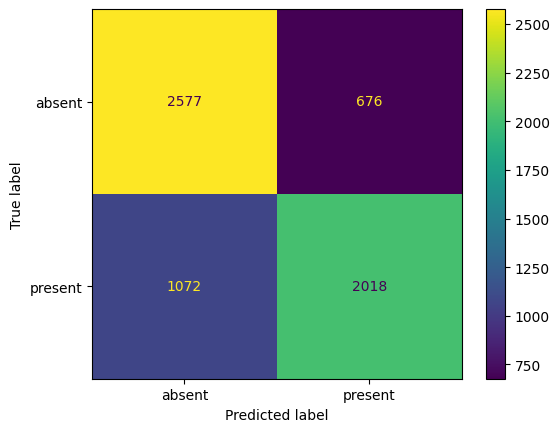

In [10]:
classification_evaluation(model=classifier_linear_svc, x_test=X_val, y_test=y_val)

In [11]:
classifier_linear_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        LinearSVC(dual=False,
                                                  max_iter=100000))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [12]:
y_predictions = classifier_linear_svc.predict(X_test)

In [13]:
print(y_predictions[:10], y_test[:10].to_list())

[1 0 0 0 0 1 0 1 0 0] [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]


### Normalization 

In [14]:
scaler_min = MinMaxScaler()

param_grid_linear_svc = {
    "svc__C": [0.1, 1, 10],
    "svc__penalty": ['l1', 'l2']
}

pipeline_linear_svc = Pipeline([
    ("scaler", scaler_min),
    ("svc", LinearSVC(max_iter=100000, dual=False))
])

classifier_linear_svc_min = GridSearchCV(
    estimator=pipeline_linear_svc,
    param_grid=param_grid_linear_svc,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    error_score='raise'
)

In [15]:
classifier_linear_svc_min.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        LinearSVC(dual=False,
                                                  max_iter=100000))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [16]:
classifier_linear_svc_min.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('svc', LinearSVC(C=0.1, dual=False, max_iter=100000))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'svc': LinearSVC(C=0.1, dual=False, max_iter=100000),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'svc__C': 0.1,
 'svc__class_weight': None,
 'svc__dual': False,
 'svc__fit_intercept': True,
 'svc__intercept_scaling': 1,
 'svc__loss': 'squared_hinge',
 'svc__max_iter': 100000,
 'svc__multi_class': 'ovr',
 'svc__penalty': 'l2',
 'svc__random_state': None,
 'svc__tol': 0.0001,
 'svc__verbose': 0}

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      3253
           1       0.75      0.65      0.70      3090

    accuracy                           0.72      6343
   macro avg       0.73      0.72      0.72      6343
weighted avg       0.73      0.72      0.72      6343



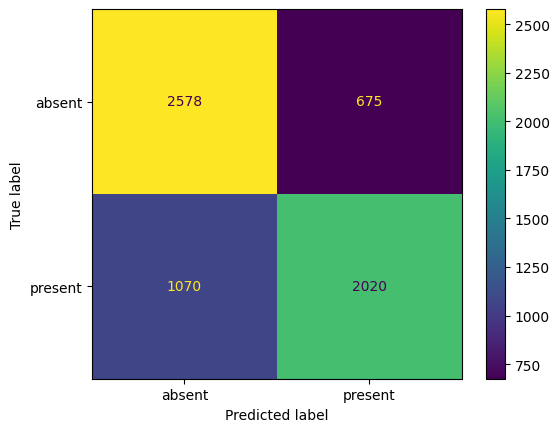

In [17]:
classification_evaluation(model=classifier_linear_svc_min, x_test=X_val, y_test=y_val)

In [18]:
classifier_linear_svc_min.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        LinearSVC(dual=False,
                                                  max_iter=100000))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [19]:
y_predictions_min = classifier_linear_svc_min.predict(X_test)

In [20]:
print(y_predictions_min[:10], y_test[:10].to_list())

[1 0 0 0 0 1 0 1 0 0] [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]


## Dataframe 2

In [21]:
dataframe_2 = pd.read_csv('../data/cleaned_dataset_1.csv')
X2, y2 = dataframe.drop("cardio", axis=1), dataframe["cardio"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)
X2_train_for_val, X2_val, y2_train_for_val, y2_val = train_test_split(X2_train, y2_train, test_size=0.2)

X2_train_for_val.shape, X2_val.shape, y2_train_for_val.shape, y2_val.shape

((25369, 12), (6343, 12), (25369,), (6343,))

### Standard scaler

In [22]:
classifier_linear_svc.fit(X2_train_for_val, y2_train_for_val)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        LinearSVC(dual=False,
                                                  max_iter=100000))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [23]:
classifier_linear_svc.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('svc', LinearSVC(C=10, dual=False, max_iter=100000, penalty='l1'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'svc': LinearSVC(C=10, dual=False, max_iter=100000, penalty='l1'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svc__C': 10,
 'svc__class_weight': None,
 'svc__dual': False,
 'svc__fit_intercept': True,
 'svc__intercept_scaling': 1,
 'svc__loss': 'squared_hinge',
 'svc__max_iter': 100000,
 'svc__multi_class': 'ovr',
 'svc__penalty': 'l1',
 'svc__random_state': None,
 'svc__tol': 0.0001,
 'svc__verbose': 0}

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      3140
           1       0.77      0.63      0.70      3203

    accuracy                           0.72      6343
   macro avg       0.73      0.72      0.72      6343
weighted avg       0.73      0.72      0.72      6343



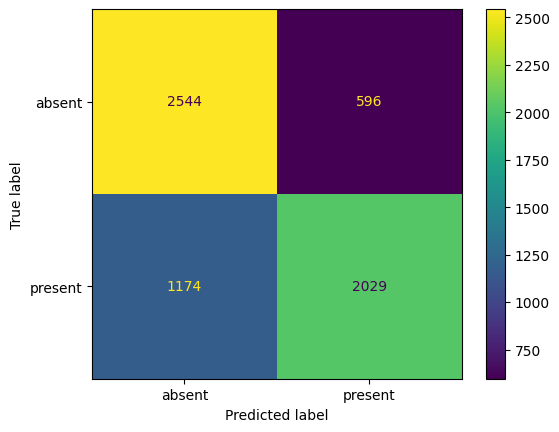

In [24]:
classification_evaluation(model=classifier_linear_svc, x_test=X2_val, y_test=y2_val)

In [25]:
y_predictions = classifier_linear_svc.predict(X2_test)

In [26]:
print(y_predictions[:10], y2_test[:10].to_list())

[0 1 1 0 0 0 1 1 0 0] [1, 1, 1, 1, 0, 0, 1, 1, 1, 0]


### Normalisation

In [27]:
classifier_linear_svc_min.fit(X2_train_for_val, y2_train_for_val)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        LinearSVC(dual=False,
                                                  max_iter=100000))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [28]:
classifier_linear_svc_min.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('svc', LinearSVC(C=10, dual=False, max_iter=100000))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'svc': LinearSVC(C=10, dual=False, max_iter=100000),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'svc__C': 10,
 'svc__class_weight': None,
 'svc__dual': False,
 'svc__fit_intercept': True,
 'svc__intercept_scaling': 1,
 'svc__loss': 'squared_hinge',
 'svc__max_iter': 100000,
 'svc__multi_class': 'ovr',
 'svc__penalty': 'l2',
 'svc__random_state': None,
 'svc__tol': 0.0001,
 'svc__verbose': 0}

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      3140
           1       0.77      0.63      0.70      3203

    accuracy                           0.72      6343
   macro avg       0.73      0.72      0.72      6343
weighted avg       0.73      0.72      0.72      6343



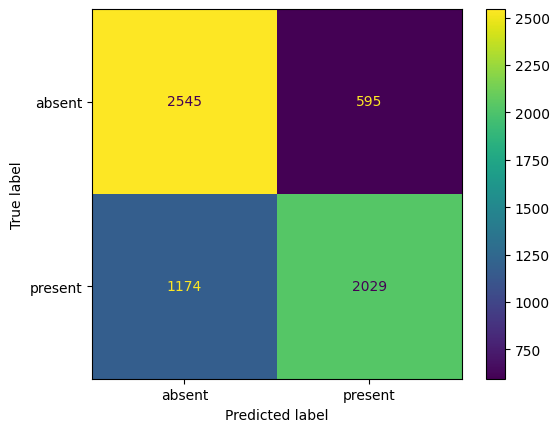

In [29]:
classification_evaluation(model=classifier_linear_svc_min, x_test=X2_val, y_test=y2_val)

In [30]:
classifier_linear_svc_min.fit(X2_train, y2_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        LinearSVC(dual=False,
                                                  max_iter=100000))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [31]:
y_predictions_min = classifier_linear_svc_min.predict(X2_test)

In [32]:
print(y_predictions_min[:10], y_test[:10].to_list())


[0 1 1 0 0 0 1 1 0 0] [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]
